In [43]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: dataset with various information about the Titanic passengers (age, sex, socio-economic status, cabin,...) 

**Goal**: analysis of what sorts of people were likely to survive.
    

## Prepare the data (Data Preprocessing)

### Load the data

We'll use the datasets provided by kaggle:[titanic/data](https://www.kaggle.com/c/titanic/data).

You can downloaded from here: [Titanic - all.zip](../datasets/Titanic/all.zip)

In [44]:
df_train = pd.read_csv("../datasets/Titanic/train.csv", index_col='PassengerId')
df_test = pd.read_csv("../datasets/Titanic/test.csv", index_col='PassengerId')

### Data variable descriptions:
<pre>
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
</pre>

### Get insight of the data (Prepare and clean)

In [45]:
df_train.head()
# df_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
print(df_train.info())
print(df_test.info())
# print(data_df.columns.values.tolist())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usag

#### Visualize with Seaborn

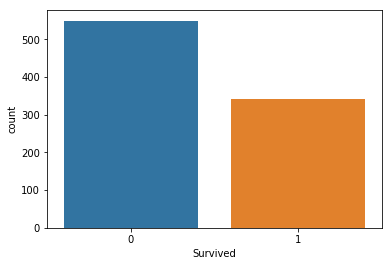

In [48]:
sns.countplot('Survived', data=df_train)

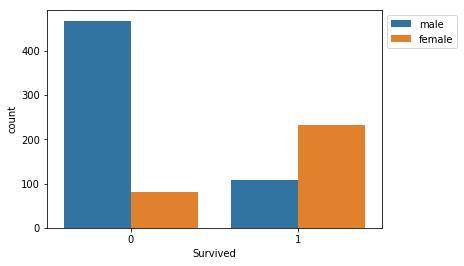

In [49]:
sns.countplot('Survived', hue='Sex', data=df_train)
# plt.title("Male/Female Survived")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

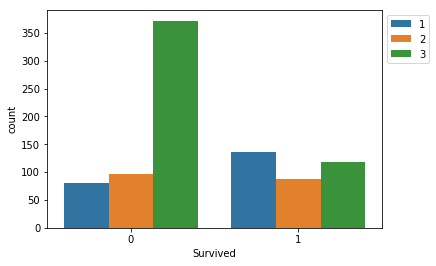

In [50]:
sns.countplot('Survived', hue='Pclass', data=df_train)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

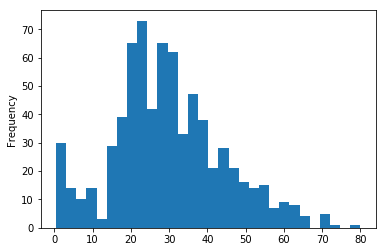

In [51]:
df_train['Age'].plot.hist(bins=30)

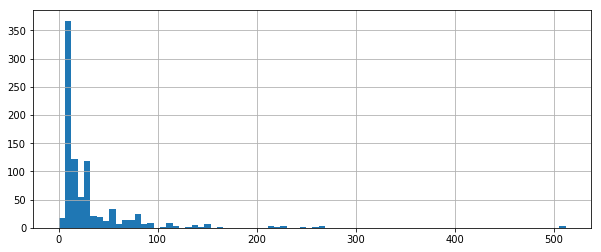

In [52]:
# df_train['Fare'].plot.hist()
df_train['Fare'].hist(bins=80, figsize=(10,4))

### Clean and wrangle the data

#### Check for NaN values

In [53]:
df_train.isnull().sum()
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Columns 'Age', 'Cabin' and 'Embarked' <span style="color:red">has NaN</span> values. We have to deal with them.

#### Deal with NaN values

In [54]:
def fill_nan_values(df):
    # Put port = Southampton for 'Embarked' null values:
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # put the mean passengers age for 'Age' null values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    # put 0 for cabin number for all 'Cabin' null values
    df["Cabin"] = df["Cabin"].fillna(0)
    
    # put the mean Fare for 'fare' null values:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    
    return df


In [55]:
df_train = fill_nan_values(df_train)
df_test = fill_nan_values(df_test)

In [56]:
# check again:
df_train.isnull().sum()
df_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Categorical text data => to numbers

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [58]:
def categories_to_numbers(df):
    if df['Sex'].dtype == "object":
        df["Sex"] = np.where(df["Sex"] == "male", 1,0) 
        
    if df['Embarked'].dtype == "object": 
        # is this more readable?
        # df.loc[df["Embarked"] == "S", "Embarked"] = 0
        # df.loc[df["Embarked"] == "C", "Embarked"] = 1
        # df.loc[df["Embarked"] == "Q", "Embarked"] = 2

        # Get the unique values of Embarked
        embarks = sorted(df['Embarked'].unique())

        # Generate a mapping of Embarked string to a numbers (0,1,...)    
        embarks_map = dict(zip(embarks, range(0, len(embarks) + 1)))

        # Transform Embarked from a string to a number representation
        df['Embarked'] = df['Embarked'].map(embarks_map).astype(int)
        
    print("df['Sex'].dtype", df['Sex'].dtype)
    print("df['Embarked'].dtype", df['Embarked'].dtype)

    return df

In [59]:
df_train = categories_to_numbers(df_train)
df_test = categories_to_numbers(df_test)
df_train.head()

df['Sex'].dtype int64
df['Embarked'].dtype int64
df['Sex'].dtype int64
df['Embarked'].dtype int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2


## Select features

### Show Correlations

In [60]:
# show correlations
# df_train_corr = df_train.corr()
# sns.heatmap(df_train_corr,annot=True, cmap="Reds")

### Drop columns we won't use

In [62]:
useless_features = ['Pclass','Sex','Age','Survived']

def drop_columns(df, columns, drop):
    if drop==1:
        for col in columns:        
            if col in df.columns:
                df = df.drop(labels=col, axis=1)
        return df
    else:
#         new_cols = df[columns]
        new_df = df[columns]
        return  new_df

    
df_train = drop_columns(df_train, useless_features, drop=0)
df_train.head()
# df_test = drop_columns(df_test, useless_features, drop=0)

,Pclass,Sex,Age,Survived
PassengerId,,,,
1,3,1,22.0,0
2,1,0,38.0,1
3,3,0,26.0,1
4,1,0,35.0,1
5,3,1,35.0,0


## Separate the training data from the test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('Survived',axis=1), 
    df_train['Survived'], 
    random_state=1)

# print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
# print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

In [66]:
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)

X_train.shape (668, 3)
X_test.shape (223, 3)
y_train.shape (668,)


## Choose the model

The problem is a categorization one, and we are going to try first with LogisticRegression.

In [67]:
from sklearn.linear_model import LogisticRegression

## Train the model (fit the model)

In [68]:
# instantiate and fit the model
model = LogisticRegression()
fitted = model.fit(X_train,y_train)

### Make predictions

In [69]:
predictions = model.predict(X_test)

In [70]:
# let's check the "learned" co-efficients:
# print(fitted.intercept_)
# print(fitted.coef_)

## Predict (classify unknown input sample)

In [71]:
y_pred = fitted.predict(X_test)

## Evaluate the model

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.67      0.74        95

   micro avg       0.80      0.80      0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.80      0.80       223



In [52]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.accuracy_score(y_test, y_pred))

0.44419524653057546
0.8026905829596412
